# Periastron/apoastron of null geodesics in Schwarzschild spacetime and related quantities

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](http://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

Click [here](https://raw.githubusercontent.com/egourgoulhon/BHLectures/master/sage/ges_null_periastron.ipynb) to download the notebook file (ipynb format). To run it, you must start SageMath with `sage -n jupyter`.

In [1]:
version()

'SageMath version 9.1.beta2, Release Date: 2020-01-26'

In [2]:
%display latex

## The cubic polynomial

In [3]:
r, b, m = var('r b m', domain='real')

In [4]:
P(r, b, m) = r^3 - b^2*r + 2*m*b^2
P(r, b, m)

2*b^2*m - b^2*r + r^3

## Roots via Viète's trigonometric method

In [5]:
r0 = 2/sqrt(3)*b*cos(pi/3 - arccos(3*sqrt(3)*m/b)/3)
r0

2/3*sqrt(3)*b*cos(1/3*pi - 1/3*arccos(3*sqrt(3)*m/b))

In [6]:
P(r0, b, m).simplify_full().trig_reduce()

0

In [7]:
r1 = 2/sqrt(3)*b*cos(pi - arccos(3*sqrt(3)*m/b)/3)
r1

2/3*sqrt(3)*b*cos(pi - 1/3*arccos(3*sqrt(3)*m/b))

In [8]:
P(r1, b, m).simplify_full().trig_reduce()

0

In [9]:
r2 = 2/sqrt(3)*b*cos(5*pi/3 - arccos(3*sqrt(3)*m/b)/3)
r2

2/3*sqrt(3)*b*cos(5/3*pi - 1/3*arccos(3*sqrt(3)*m/b))

In [10]:
P(r2, b, m).simplify_full().trig_reduce()

0

In [11]:
rm(b) = r1.subs({m: 1})
rp(b) = r0.subs({m: 1})
ra(b) = r2.subs({m: 1})

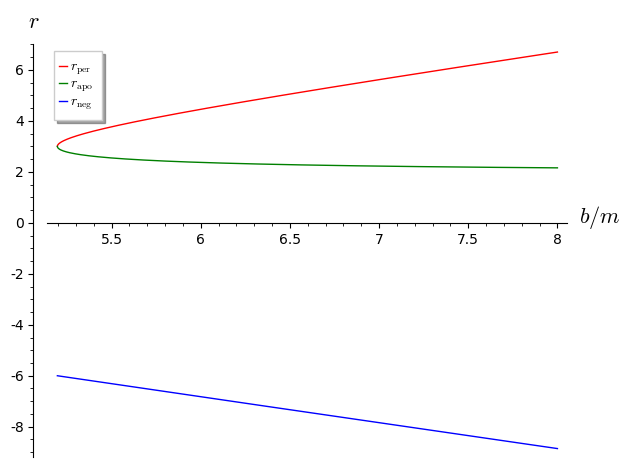

In [12]:
g = plot(rp(b), (b, 3*sqrt(3), 8), color='red', legend_label=r'$r_{\rm per}$',
         axes_labels=[r'$b/m$', r'$r$']) \
    + plot(ra(b), (b, 3*sqrt(3), 8), color='green', legend_label=r'$r_{\rm apo}$') \
    + plot(rm(b), (b, 3*sqrt(3), 8), color='blue', legend_label=r'$r_{\rm neg}$')
g

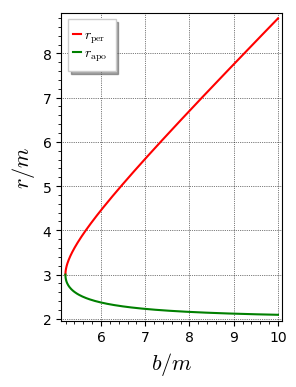

In [13]:
g = plot(rp(b), (b, 3*sqrt(3), 10), color='red', thickness=1.5,
         legend_label=r'$r_{\rm per}$', axes_labels=[r'$b/m$', r'$r/m$'], 
         frame=True, gridlines=True, aspect_ratio=1) \
    + plot(ra(b), (b, 3*sqrt(3), 10), color='green', thickness=1.5,
           legend_label=r'$r_{\rm apo}$')
g

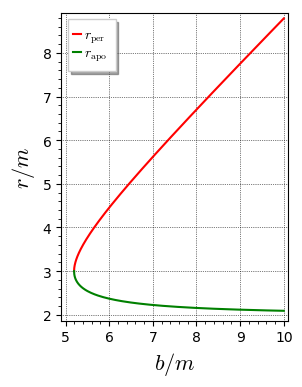

In [14]:
show(g, xmin=5, ymin=2)

In [15]:
g.save('ges_null_per_apo.pdf', xmin=5, ymin=2)

## Expansions close to $b_{\rm crit}$

### Expansion of the form $b = b_{\rm crit} + x$

In [16]:
bcrit = 3*sqrt(3)

In [17]:
rpx = rp(bcrit + x).taylor(x, 0, 2)
rpx

59/972*3^(1/4)*sqrt(2)*x^(3/2) - 4/2187*x^2 + 1/3*3^(3/4)*sqrt(2)*sqrt(x) + 8/27*sqrt(3)*x + 3

In [18]:
rax = ra(bcrit + x).taylor(x, 0, 2)
rax

-59/972*3^(1/4)*sqrt(2)*x^(3/2) - 4/2187*x^2 - 1/3*3^(3/4)*sqrt(2)*sqrt(x) + 8/27*sqrt(3)*x + 3

In [19]:
upx = (1/rpx).taylor(x, 0, 2)
upx

61/8748*3^(1/4)*sqrt(2)*x^(3/2) + 49/19683*x^2 - 1/27*3^(3/4)*sqrt(2)*sqrt(x) - 2/243*sqrt(3)*x + 1/3

In [20]:
uax = (1/rax).taylor(x, 0, 2)
uax

-61/8748*3^(1/4)*sqrt(2)*x^(3/2) + 49/19683*x^2 + 1/27*3^(3/4)*sqrt(2)*sqrt(x) - 2/243*sqrt(3)*x + 1/3

### Expansion of the form $u_{\rm per} = \frac{1}{3} (1 - x)$

In [21]:
up = (1 - x)/3

In [22]:
bx = 1/(up*sqrt(1 - 2*up)).simplify_full()
bx

-3/((x - 1)*sqrt(2/3*x + 1/3))

In [23]:
upx = (1/rp(bx)).simplify_full().taylor(x, 0, 3)
upx

-1/3*x + 1/3

In [24]:
P(1/upx, bx, 1).simplify_full()

0

In [25]:
uax = (1/ra(bx)).simplify_full().taylor(x, 0, 3)
uax

4/27*x^3 - 2/9*x^2 + 1/3*x + 1/3

In [26]:
P(1/uax, bx, 1).simplify_full().taylor(x, 0, 3)

0

In [27]:
umx = (1/rm(bx)).simplify_full().taylor(x, 0, 3)
umx

-4/27*x^3 + 2/9*x^2 - 1/6

In [28]:
P(1/umx, bx, 1).simplify_full().taylor(x, 0, 3)

0

Another check:

In [29]:
umx + upx + uax

1/2

## The polynomial $P_b(u)$

In [30]:
P(u, b) = 2*u^3 - u^2 + 1/b^2
P

(u, b) |--> 2*u^3 - u^2 + 1/b^2

In [31]:
b_crit = 3*sqrt(3)
b_sel = [3, 4, b_crit, 7, 20]
b_sel

[3, 4, 3*sqrt(3), 7, 20]

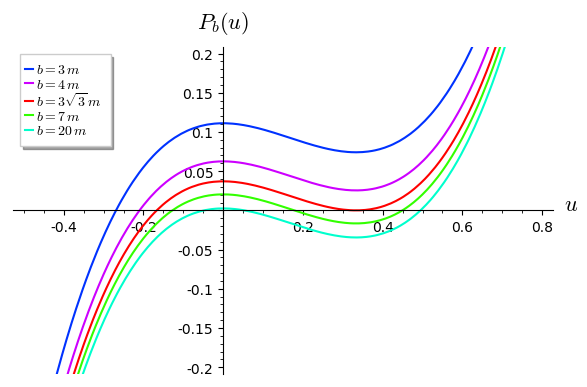

In [32]:
graph = Graphics()
for b in b_sel:
    if b == b_crit:
        legend_label = r'$b = 3\sqrt{3}\, m$'
    else:
        legend_label=r'$b = {:.0f} \, m$'.format(float(b))
    graph += plot(P(u, b), (u, -0.5, 0.8), color = hue((b - b_crit)/6), 
                  legend_label=legend_label, thickness=1.5,
                  axes_labels=[r"$u$", r"$P_b(u)$"])
show(graph, ymin=-0.2, ymax=0.2)

In [33]:
graph.save('ges_polynomial_b_u.pdf', ymin=-0.2, ymax=0.2)

### Roots of $P_b(u)$

The depressed polynomial:

In [34]:
b = var('b')
pd = (P(x + 1/6, b)/2).expand()
pd

x^3 - 1/12*x + 1/2/b^2 - 1/108

In [35]:
p = -1/12
q = 1/(2*b^2) - 1/108
p, q

(-1/12, 1/2/b^2 - 1/108)

Roots via Viète formula:

In [36]:
3*q/(2*p)*sqrt(-3/p)

-54/b^2 + 1

In [37]:
psi = arcsin(b_crit/b)
un(b) = 1/3*cos(2*psi/3 + 2*pi/3) + 1/6
un(b)

1/3*cos(2/3*pi + 2/3*arcsin(3*sqrt(3)/b)) + 1/6

In [38]:
P(un(b), b).simplify_full().trig_reduce().trig_expand()

0

In [39]:
up(b) = 1/3*cos(2*psi/3 + 4*pi/3) + 1/6
up(b)

1/3*cos(4/3*pi + 2/3*arcsin(3*sqrt(3)/b)) + 1/6

In [40]:
P(up(b), b).simplify_full().trig_reduce().trig_expand()

0

In [41]:
ua(b) = 1/3*cos(2*psi/3) + 1/6
ua(b)

1/3*cos(2/3*arcsin(3*sqrt(3)/b)) + 1/6

In [42]:
P(ua(b), b).simplify_full().trig_reduce().trig_expand()

0

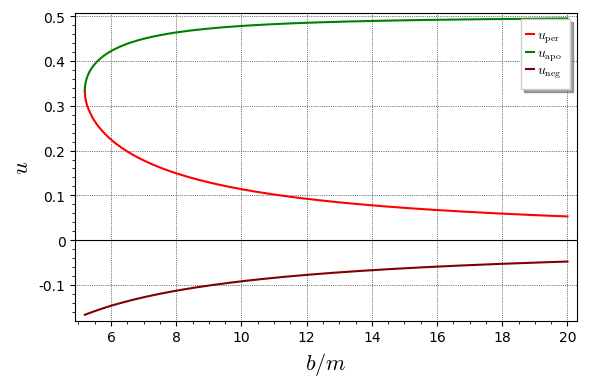

In [43]:
g = plot(up(b), (b, 3*sqrt(3), 20), color='red', thickness=1.5,
         legend_label=r'$u_{\rm per}$', axes_labels=[r'$b/m$', r'$u$'], 
         frame=True, gridlines=True) \
    + plot(ua(b), (b, 3*sqrt(3), 20), color='green', thickness=1.5,
           legend_label=r'$u_{\rm apo}$') \
    + plot(un(b), (b, 3*sqrt(3), 20), color='maroon', thickness=1.5,
           legend_label=r'$u_{\rm neg}$')
g

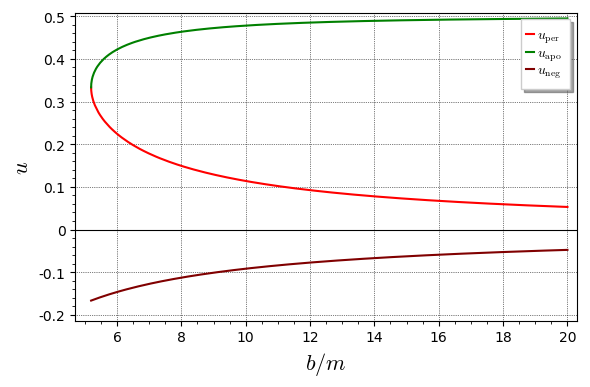

In [44]:
show(g, xmin=5, ymin=-0.2)

In [45]:
g.save('gis_u_per_apo_neg.pdf', xmin=5, ymin=-0.2)

## Elliptic modulus $k$

In [46]:
k(b) = sqrt((up(b) - un(b))/(ua(b) - un(b))).simplify_full()
k(b)

sqrt(2)*sqrt(sqrt(3)*sin(2/3*arcsin(3*sqrt(3)/b))/(sqrt(3)*sin(2/3*arcsin(3*sqrt(3)/b)) + 3*cos(2/3*arcsin(3*sqrt(3)/b))))

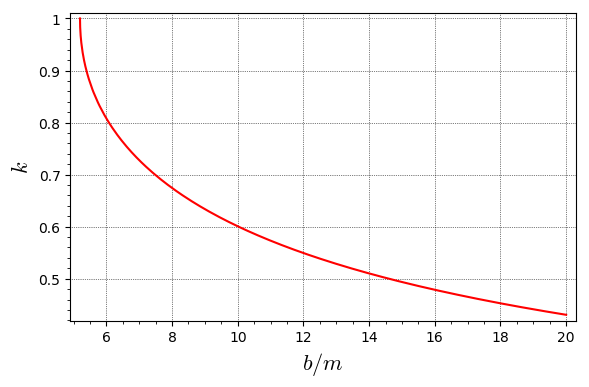

In [47]:
g = plot(k(b), (b, 3*sqrt(3), 20), color='red', thickness=1.5,
         axes_labels=[r'$b/m$', r'$k$'], 
         frame=True, gridlines=True)
g

In [48]:
g.save("gis_elliptic_mod.pdf")

In [49]:
k1(b) = sqrt(2) / sqrt(sqrt(3)*cot(2/3*arcsin(3*sqrt(3)/b)) + 1)
k1(b)

sqrt(2)/sqrt(sqrt(3)*cot(2/3*arcsin(3*sqrt(3)/b)) + 1)

In [50]:
(k(b)^2 - k1(b)^2).simplify_full()

0

### Series expansion for $b$ close to $b_{\rm crit}$

In [51]:
upx = 1/3 - x

In [52]:
bx = 1/(upx*sqrt(1 - 2*upx)).simplify_full()
bx

-3/((3*x - 1)*sqrt(2*x + 1/3))

In [53]:
up(bx).taylor(x, 0, 2)

-x + 1/3

In [79]:
bx.taylor(x, 0, 2)

81/2*sqrt(3)*x^2 + 3*sqrt(3)

In [54]:
uax = ua(bx).taylor(x, 0, 2)
uax

-2*x^2 + x + 1/3

In [55]:
unx = un(bx).taylor(x, 0, 2)
unx

2*x^2 - 1/6

In [56]:
kx = k(bx).taylor(x, 0, 2)
kx

4*x^2 - 2*x + 1

In [57]:
sin_ax = (sqrt(upx/uax)/kx).taylor(x, 0, 2)
sin_ax

3/2*x^2 - x + 1

In [58]:
ax = (arcsin(sqrt(upx/uax)/kx)).taylor(x, 0, 2)
ax

1/2*pi + 2/3*sqrt(2)*x^(3/2) - sqrt(2)*sqrt(x)

In [59]:
tan_ax = tan(arcsin(sqrt(upx/uax)/kx)).taylor(x, 0, 2)
tan_ax

-11/2*sqrt(2)*x^(3/2) + 1/2*sqrt(2)/sqrt(x)

In [60]:
(tan_ax * sqrt(1 - k(bx)^2)).taylor(x, 0, 2)

-33/8*sqrt(2)*x^2 - 3/2*sqrt(2)*x + sqrt(2)

In [61]:
(1/_).taylor(x, 0, 2)

51/16*sqrt(2)*x^2 + 3/4*sqrt(2)*x + 1/2*sqrt(2)

In [62]:
sin(arctan(1/sqrt(2))).simplify_full()

1/3*sqrt(3)

In [63]:
arctan(1/sqrt(2)).simplify_full()

arctan(1/2*sqrt(2))

In [64]:
sqrt(1 - k(bx)^2).taylor(x, 0, 2)

-3*x^(3/2) + 2*sqrt(x)

In [65]:
aax = arcsin(sqrt(upx/uax)/kx)
(tan(aax) + sec(aax)).taylor(x, 0, 2)

-45/4*sqrt(2)*x^(3/2) + 1/2*sqrt(2)*sqrt(x) + sqrt(2)/sqrt(x)

In [67]:
(3*sqrt(3)/bx).taylor(x, 0, 2)

-27/2*x^2 + 1

In [68]:
(2/3)*arcsin((3*sqrt(3)/bx)).taylor(x, 0, 2)

1/3*pi + 2*sqrt(3)*x^2 - 2*sqrt(3)*x